---
# **Hourse Price Prediction by Using Python**
## **Name:** Usman Tariq
## **Email:** usm6329@gmail.com
---

# Dataset Description

I download the dataset from this [link](https://www.kaggle.com/competitions/home-data-for-ml-course/data)

### File descriptions
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

### Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inlinea

In [2]:
train_df = pd.read_csv("train.csv")
print("Train Data Shape:",train_df.shape)
test_df = pd.read_csv("test.csv")
print("Test Data Shape:",test_df.shape)

Train Data Shape: (1460, 81)
Test Data Shape: (1459, 80)


In [3]:
train_limit = train_df.shape[0]
train_limit

1460

In [4]:
test_limit = test_df.shape[0]
test_limit

1459

In [5]:
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 100)

In [6]:
train_df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1306  1307         120       RL         48.0     6955   Pave   NaN      IR1   
344    345         160       RM         36.0     2592   Pave   NaN      Reg   
1161  1162          20       RL          NaN    14778   Pave   NaN      IR1   
359    360          60       RL         78.0    12011   Pave   NaN      IR1   
419    420          20       RL         65.0     8450   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1306         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
344          Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1161         Low    AllPub   CulDSac       Gtl      Crawfor       PosN   
359          Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
419          Lvl    AllPub    Inside       Gtl        NAmes       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1306       Norm   TwnhsE     1Story            7            5       2005   
344        Norm   TwnhsE     2Story            5            3       1976   
1161       Norm     1Fam     1Story            6            7       1954   
359        Norm     1Fam     2Story            8            5       1998   
419        Norm     1Fam     1Story            5            6       1968   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1306          2006     Gable  CompShg     VinylSd     VinylSd      Stone   
344           1976     Gable  CompShg     CemntBd     CmentBd        NaN   
1161          2006       Hip  CompShg     HdBoard     HdBoard    BrkFace   
359           1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
419           1968     Gable  CompShg     VinylSd     VinylSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1306        94.0        Gd        TA      PConc       Gd       TA   
344          0.0        TA        TA     CBlock       Gd       TA   
1161        72.0        Gd        TA     CBlock       TA       TA   
359        530.0        Gd        TA      PConc       Gd       TA   
419          0.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1306           No          Unf           0          Unf           0   
344            No          Rec         129          BLQ         232   
1161           No          BLQ         728          Unf           0   
359            Av          GLQ         956          Unf           0   
419            No          BLQ         775          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1306       1368         1368    GasA        Ex          Y      SBrkr   
344         175          536    GasA        TA          Y      SBrkr   
1161        568         1296    GasA        Ex          Y      SBrkr   
359         130         1086    GasA        Ex          Y      SBrkr   
419         281         1056    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1306      1368         0             0       1368             0             0   
344        536       576             0       1112             0             0   
1161      1640         0             0       1640             1             0   
359       1086       838             0       1924             1             0   
419       1056         0             0       1056             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1306         2         0             2             1          Gd   
344          1         1             3             1          TA   
1161         1         0             3             1          Gd   
359          2         1             3             1          Gd   
419          1         0             3             1          TA   

   

In [7]:
test_df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
801   2262         120       RL         35.0     5118   Pave   NaN      IR1   
662   2123          30       RM          NaN     6120   Pave   NaN      Reg   
1161  2622          60       RL         54.0     9783   Pave   NaN      IR1   
611   2072          50       RL         60.0    10836   Pave  Grvl      Reg   
197   1658         160       RL         24.0     2364   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
801          HLS    AllPub    Inside       Gtl      StoneBr       Norm   
662          Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
1161         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
611          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
197          Lvl    AllPub    Inside       Gtl      NPkVill       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
801        Norm   TwnhsE     1Story            8            5       1990   
662        Norm     1Fam     1Story            5            6       1945   
1161       Norm     1Fam     2Story            6            5       1996   
611        Norm     1Fam     1.5Fin            5            5       1922   
197        Norm   TwnhsE     2Story            6            5       1978   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
801           1990     Gable  CompShg     CemntBd     CmentBd        NaN   
662           1995     Gable  CompShg     Plywood     Plywood        NaN   
1161          1996     Gable  CompShg     HdBoard     HdBoard        NaN   
611           1950     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   
197           1978     Gable  CompShg     Plywood     Brk Cmn        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
801          0.0        Gd        TA      PConc       Gd       TA   
662          0.0        TA        Gd     CBlock      NaN      NaN   
1161         0.0        TA        TA      PConc       Gd       TA   
611          0.0        TA        TA     BrkTil       TA       TA   
197          0.0        Gd        TA     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
801            Gd          GLQ       926.0          Unf         0.0   
662           NaN          NaN         0.0          NaN         0.0   
1161           No          Unf         0.0          Unf         0.0   
611            No          Unf         0.0          Unf         0.0   
197            No          ALQ       279.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
801       386.0       1312.0    GasA        Gd          Y      SBrkr   
662         0.0          0.0    GasA        Gd          N      SBrkr   
1161      821.0        821.0    GasA        Gd          Y      SBrkr   
611       892.0        892.0    GasA        Ex          Y      SBrkr   
197       576.0        855.0    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
801       1321         0             0       1321           1.0           0.0   
662        808         0             0        808           0.0           0.0   
1161       821       955             0       1776           0.0           0.0   
611       1254       182             0       1436           0.0           1.0   
197        855       601             0       1456           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
801          1         0             1             1          Gd   
662          1         0             1             1          TA   
1161         2         1             3             1          TA   
611          1         0             3             1          TA   
197          2         1             3             1          TA   

   

In [8]:
combined_df = pd.concat((train_df, test_df))
combined_df.shape

(2919, 81)

In [9]:
df = combined_df.copy()
df.shape

(2919, 81)

In [10]:
df.set_index('Id', inplace=True)

In [11]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd        NaN   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ       706.0          Unf         0.0      150.0        856.0   
2           ALQ       978.0          Unf         0.0      284.0       1262.0   
3           GLQ       486.0          Unf         0.0      434.0        920.0   
4           ALQ       216.0          Unf         0.0      540.0        756.0   
5           GLQ       655.0          Unf         0.0      490.0       1145.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   
2        1262           0.0           1.0  

In [12]:
df.tail()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
2915         160       RM         21.0     1936   Pave   NaN      Reg   
2916         160       RM         21.0     1894   Pave   NaN      Reg   
2917          20       RL        160.0    20000   Pave   NaN      Reg   
2918          85       RL         62.0    10441   Pave   NaN      Reg   
2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
2915         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2916         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2917         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2918         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2919         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
2915       Norm    Twnhs     2Story            4            7       1970   
2916       Norm   TwnhsE     2Story            4            5       1970   
2917       Norm     1Fam     1Story            5            7       1960   
2918       Norm     1Fam     SFoyer            5            5       1992   
2919       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
2915          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
2916          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
2917          1996     Gable  CompShg     VinylSd     VinylSd        NaN   
2918          1992     Gable  CompShg     HdBoard     Wd Shng        NaN   
2919          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
2915         0.0        TA        TA     CBlock       TA       TA   
2916         0.0        TA        TA     CBlock       TA       TA   
2917         0.0        TA        TA     CBlock       TA       TA   
2918         0.0        TA        TA      PConc       Gd       TA   
2919        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
2915           No          Unf         0.0          Unf         0.0   
2916           No          Rec       252.0          Unf         0.0   
2917           No          ALQ      1224.0          Unf         0.0   
2918           Av          GLQ       337.0          Unf         0.0   
2919           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
2915      546.0        546.0    GasA        Gd          Y      SBrkr   
2916      294.0        546.0    GasA        TA          Y      SBrkr   
2917        0.0       1224.0    GasA        Ex          Y      SBrkr   
2918      575.0        912.0    GasA        TA          Y      SBrkr   
2919      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
2915       546       546             0       1092           0.0           0.0   
2916       546       546             0       1092           0.0           0.0   
2917      1224         0             0       1224           1.0           0.0   
2918       970   

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [14]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  2919.000000  2433.000000    2919.000000  2919.000000  2919.000000   
mean     57.137718    69.305795   10168.114080     6.089072     5.564577   
std      42.517628    23.344905    7886.996359     1.409947     1.113131   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7478.000000     5.000000     5.000000   
50%      50.000000    68.000000    9453.000000     6.000000     5.000000   
75%      70.000000    80.000000   11570.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  2919.000000   2919.000000  2896.000000  2918.000000  2918.000000   
mean   1971.312778   1984.264474   102.201312   441.423235    49.582248   
std      30.291442     20.894344   179.334253   455.610826   169.205611   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.500000   1965.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1993.000000     0.000000   368.500000     0.000000   
75%    2001.000000   2004.000000   164.000000   733.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1526.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  2918.000000  2918.000000  2919.000000  2919.000000   2919.000000   
mean    560.772104  1051.777587  1159.581706   336.483727      4.694416   
std     439.543659   440.766258   392.362079   428.701456     46.396825   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     220.000000   793.000000   876.000000     0.000000      0.000000   
50%     467.000000   989.500000  1082.000000     0.000000      0.000000   
75%     805.500000  1302.000000  1387.500000   704.000000      0.000000   
max    2336.000000  6110.000000  5095.000000  2065.000000   1064.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  2919.000000   2917.000000   2917.000000  2919.000000  2919.000000   
mean   1500.759849      0.429894      0.061364     1.568003     0.380267   
std     506.051045      0.524736      0.245687     0.552969     0.502872   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1126.000000      0.000000      0.000000     1.000000     0.000000   
50%    1444.000000      0.000000      0.000000     2.000000     0.000000   
75%    1743.500000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     4.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   2919.000000   2919.000000   2919.000000  2919.000000  2760.000000   
mean       2.860226      1.044536      6.451524     0.597122  1978.113406   
std        0.822693      0.214462      1.569379     0.646129    25.574285   
min        0.000000      0.000000      2.000000     0.000000  1895.000000   
25%        2.000000      1.000000      5.000000     0.000000  1960.000000   
50%        3.000000      1.000000      6.000000     1.000000  1979.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     15.000000     4.000000  2207.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  2918.000000  2918.000000  2919.000000  2919.000000    2919.000000   
mean      1.766621   472.874572    93.709832    47.486811      23.098321   
std       0.761624   215.394815   126.526589    67.575493      64.244246   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   320.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    26.000000       0.000000   
75%       2.000000   576.000000   168.000000    70.000000   

## Numerical Columns

In [15]:
numeric_df = df.select_dtypes(['int64', 'float64'])
print(len(numeric_df.columns))
numeric_df.columns

37


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Categorical Columns

In [16]:
categorical_df = df.select_dtypes(['object'])
print(len(categorical_df.columns))
categorical_df.columns

43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Cleaning Numerical Columns

<Axes: ylabel='Id'>

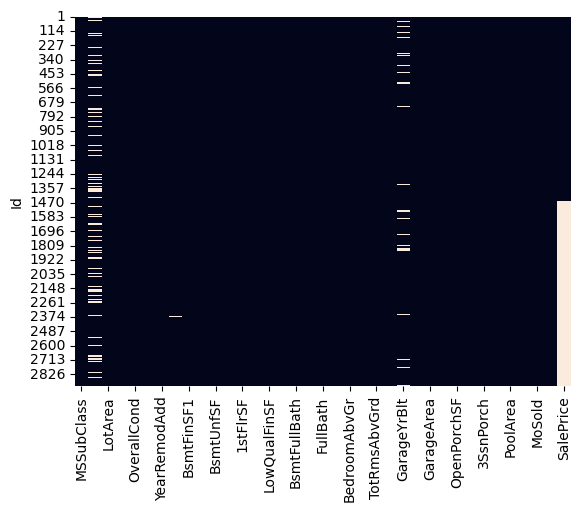

In [17]:
sns.heatmap(numeric_df.isnull(), cbar=False)

In [18]:
numeric_cols_with_missing_values = list(numeric_df.columns[numeric_df.isnull().any()])
numeric_cols_with_missing_values

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [19]:
len(numeric_cols_with_missing_values)

12

In [20]:
numeric_df.isnull().sum().sort_values(ascending=False)

SalePrice        1459
LotFrontage       486
GarageYrBlt       159
MasVnrArea         23
BsmtHalfBath        2
BsmtFullBath        2
TotalBsmtSF         1
GarageCars          1
GarageArea          1
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
WoodDeckSF          0
YrSold              0
MoSold              0
OpenPorchSF         0
EnclosedPorch       0
MiscVal             0
Fireplaces          0
ScreenPorch         0
PoolArea            0
3SsnPorch           0
MSSubClass          0
TotRmsAbvGrd        0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
GrLivArea           0
LowQualFinSF        0
2ndFlrSF            0
1stFlrSF            0
YearRemodAdd        0
YearBuilt           0
OverallCond         0
OverallQual         0
LotArea             0
FullBath            0
dtype: int64

In [21]:
# numeric_cols_with_missing_values = numeric_cols_with_missing_values.remove("SalePrice")
# print(numeric_cols_with_missing_values)

numeric_cols_with_missing_values.remove("SalePrice")

In [22]:
numeric_cols_with_missing_values

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [23]:
for col in numeric_cols_with_missing_values:
    df[col]=df[col].fillna(df[col].mean())

In [24]:
numeric_df = df.select_dtypes(['int64', 'float64'])
print(len(numeric_df.columns))
numeric_df.columns

37


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<Axes: ylabel='Id'>

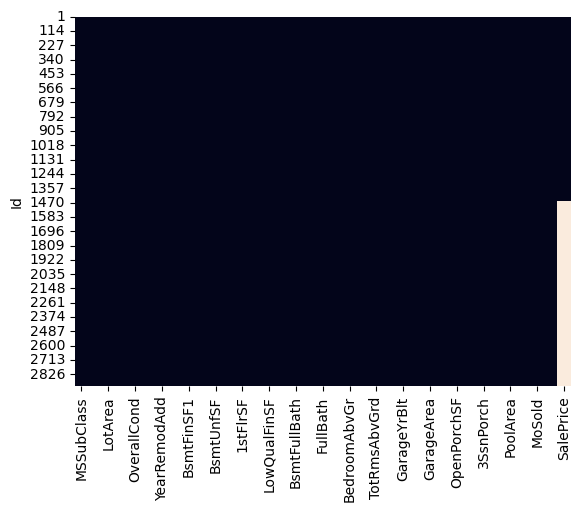

In [25]:
sns.heatmap(numeric_df.isnull(), cbar=False)

## Cleaning Categorical Columns

<Axes: ylabel='Id'>

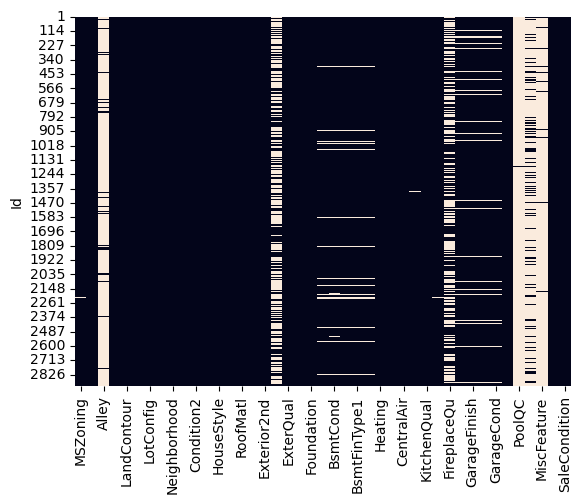

In [26]:
sns.heatmap(categorical_df.isnull(), cbar=False)

In [27]:
categorical_cols_with_missing_values = list(categorical_df.columns[categorical_df.isnull().any()])
categorical_cols_with_missing_values

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [28]:
len(categorical_cols_with_missing_values)

23

In [29]:
# identify the categorical columns containing the missing values with more than 50%.
cols_with_more_missing_values = list(df[categorical_cols_with_missing_values].loc[: , (categorical_df.isnull().sum()/df.shape[0] * 100) > 50].columns)
cols_with_more_missing_values = cols_with_more_missing_values

cols_with_more_missing_values

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [30]:
# Extra list of categorical features for which do not fill the 'NA' values, because here 'NA' does not means the missing value.
# In the following extra features 'NA' means 'zero'.  (See description file for more details.)


extra_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']
extra_cols

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [31]:
# deleting the 'cols_with_more_missing_values' from main dataset.
df.drop(cols_with_more_missing_values, axis=1, inplace=True)
df.shape

(2919, 75)

In [32]:
# deleting the 'cols_with_more_missing_values' from categorical dataset.
categorical_df.drop(cols_with_more_missing_values, axis=1, inplace=True)
categorical_df.shape

(2919, 38)

In [33]:
categorical_df.isnull().sum().sort_values(ascending=False)

FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MSZoning            4
Utilities           2
Functional          2
SaleType            1
Exterior1st         1
Exterior2nd         1
KitchenQual         1
Electrical          1
HouseStyle          0
CentralAir          0
PavedDrive          0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Heating             0
HeatingQC           0
RoofStyle           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
Street              0
Foundation          0
ExterCond           0
ExterQual           0
RoofMatl            0
SaleCondition       0
dtype: int64

In [34]:
after_drop_categorical_cols_with_missing_values = list(categorical_df.columns[categorical_df.isnull().any()])
after_drop_categorical_cols_with_missing_values

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [35]:
for col in extra_cols:
    if col in after_drop_categorical_cols_with_missing_values:
        after_drop_categorical_cols_with_missing_values.remove(col)
    else:
        pass

In [36]:
after_drop_categorical_cols_with_missing_values

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'Electrical',
 'KitchenQual',
 'Functional',
 'SaleType']

In [37]:
for col in after_drop_categorical_cols_with_missing_values:
    df[col]=df[col].fillna(df[col].mode()[0])

In [38]:
categorical_df = df.select_dtypes(['object'])
print(len(categorical_df.columns))
categorical_df.columns

38


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

<Axes: ylabel='Id'>

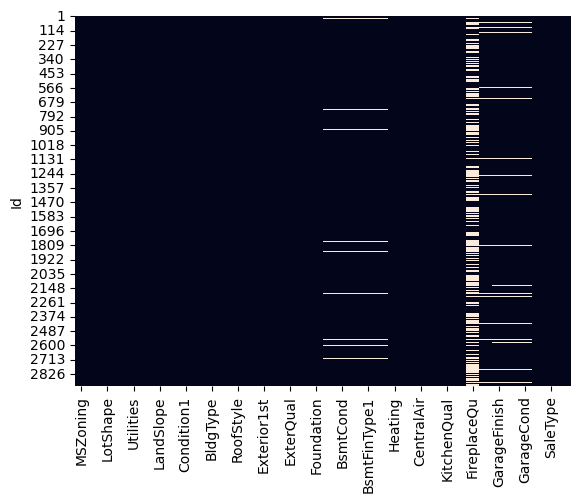

In [39]:
sns.heatmap(categorical_df.isnull(), cbar=False)

<Axes: ylabel='Id'>

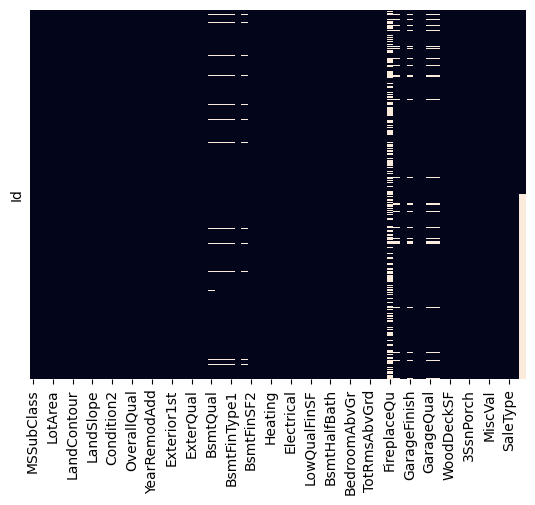

In [40]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

## Categorical Features Transforming into Numerical

In [41]:
categorical_df = df.select_dtypes(['object'])
print(len(categorical_df.columns))
categorical_df.columns

38


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [42]:
df.shape

(2919, 75)

In [43]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [44]:
from pandas.api.types import CategoricalDtype

In [45]:
df['MSZoning'] = df['MSZoning'].astype(CategoricalDtype(categories=['C (all)', 'FV', 'RH', 'RL', 'RM'], ordered=True)).cat.codes

In [46]:
df['MSZoning'].unique()

array([3, 4, 0, 1, 2], dtype=int8)

In [47]:
for col in list(categorical_df.columns):
    print(col, '=', df[col].unique())

MSZoning = [3 4 0 1 2]
Street = ['Pave' 'Grvl']
LotShape = ['Reg' 'IR1' 'IR2' 'IR3']
LandContour = ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities = ['AllPub' 'NoSeWa']
LotConfig = ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope = ['Gtl' 'Mod' 'Sev']
Neighborhood = ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 = ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 = ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType = ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle = ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle = ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl = ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st = ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBo

In [48]:
df['LotShape'] = df['LotShape'].astype(CategoricalDtype(categories=['IR3', 'IR2', 'IR1', 'Reg'], ordered=True)).cat.codes
df['LandContour'] = df['LandContour'].astype(CategoricalDtype(categories=['Low', 'HLS', 'Bnk', 'Lvl'], ordered=True)).cat.codes
df['Utilities'] = df['Utilities'].astype(CategoricalDtype(categories=['NoSeWa', 'AllPub'], ordered=True)).cat.codes
df['LotConfig'] = df['LotConfig'].astype(CategoricalDtype(categories=['FR3', 'FR2', 'CulDSac', 'Corner', 'Inside'], ordered=True)).cat.codes
df['LandSlope'] = df['LandSlope'].astype(CategoricalDtype(categories=['Sev', 'Mod', 'Gtl'], ordered=True)).cat.codes
df['Condition1'] = df['Condition1'].astype(CategoricalDtype(categories=['RRAe','RRNe','PosA','PosN','RRAn','RRNn','Norm','Feedr','Artery'], ordered=True)).cat.codes
df['Condition2'] = df['Condition2'].astype(CategoricalDtype(categories=['RRAe','RRNe','PosA','PosN','RRAn','RRNn','Norm','Feedr','Artery'], ordered=True)).cat.codes
df['BldgType'] = df['BldgType'].astype(CategoricalDtype(categories=['Twnhs','TwnhsE','Duplex','2fmCon','1Fam'], ordered=True)).cat.codes
df['HouseStyle'] = df['HouseStyle'].astype(CategoricalDtype(categories=['SLvl','SFoyer','2.5Unf','2.5Fin','2Story','1.5Unf','1.5Fin','1Story'], ordered=True)).cat.codes
df['RoofStyle'] = df['RoofStyle'].astype(CategoricalDtype(categories=['Shed','Mansard','Hip','Gambrel','Gable','Flat'], ordered=True)).cat.codes
df['RoofMatl'] = df['RoofMatl'].astype(CategoricalDtype(categories=['WdShngl','WdShake','Tar&Grv','Roll','Metal','Membran','CompShg','ClyTile'], ordered=True)).cat.codes
df['Exterior1st'] = df['Exterior1st'].astype(CategoricalDtype(categories=['WdShing','Wd Sdng','VinylSd','Stucco','Stone','Plywood','MetalSd','ImStucc','HdBoard','CemntBd','CBlock','BrkFace','BrkComm','AsphShn','AsbShng'], ordered=True)).cat.codes
df['Exterior2nd'] = df['Exterior2nd'].astype(CategoricalDtype(categories=['Wd Shng','Wd Sdng','Stucco','VinylSd','Stone','Plywood','Other','MetalSd','ImStucc','HdBoard','CmentBd','CBlock','BrkFace','Brk Cmn','AsphShn','AsbShng'], ordered=True)).cat.codes
df['ExterQual'] = df['ExterQual'].astype(CategoricalDtype(categories=['Fa','TA','Gd','Ex' ], ordered=True)).cat.codes
df['ExterCond'] = df['ExterCond'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex' ], ordered=True)).cat.codes
df['Foundation'] = df['Foundation'].astype(CategoricalDtype(categories=['Wood','Stone','Slab','PConc','CBlock','BrkTil'], ordered=True)).cat.codes

df['BsmtQual'] = df['BsmtQual'].astype(CategoricalDtype(categories=['nan','Fa','TA','Gd','Ex'], ordered=True)).cat.codes

df['BsmtCond'] = df['BsmtCond'].astype(CategoricalDtype(categories=['nan','Po','Fa','TA','Gd'], ordered=True)).cat.codes

df['BsmtExposure'] = df['BsmtExposure'].astype(CategoricalDtype(categories=['nan','No','Mn','Av','Gd'], ordered=True)).cat.codes

df['BsmtFinType1'] = df['BsmtFinType1'].astype(CategoricalDtype(categories=['nan','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered=True)).cat.codes

df['BsmtFinType2'] = df['BsmtFinType2'].astype(CategoricalDtype(categories=['nan','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered=True)).cat.codes

df['Heating'] = df['Heating'].astype(CategoricalDtype(categories=['Wall','OthW','Grav','GasW','GasA','Floor'], ordered=True)).cat.codes

df['HeatingQC'] = df['HeatingQC'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'], ordered=True)).cat.codes

df['CentralAir'] = df['CentralAir'].astype(CategoricalDtype(categories=['N','Y'], ordered=True)).cat.codes

df['Electrical'] = df['Electrical'].astype(CategoricalDtype(categories=['Mix','FuseP','FuseF','FuseA','SBrkr'], ordered=True)).cat.codes

df['KitchenQual'] = df['KitchenQual'].astype(CategoricalDtype(categories=['Fa','TA','Gd','Ex'], ordered=True)).cat.codes

df['Functional'] = df['Functional'].astype(CategoricalDtype(categories=['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'], ordered=True)).cat.codes

df['FireplaceQu'] = df['FireplaceQu'].astype(CategoricalDtype(categories=['nan','Po','Fa','TA','Gd','Ex'], ordered=True)).cat.codes

df['GarageType'] = df['GarageType'].astype(CategoricalDtype(categories=['nan','Detchd','CarPort','BuiltIn','Basment','Attchd','2Types'], ordered=True)).cat.codes

df['GarageFinish'] = df['GarageFinish'].astype(CategoricalDtype(categories=['nan','Unf','RFn','Fin'], ordered=True)).cat.codes

df['GarageQual'] = df['GarageQual'].astype(CategoricalDtype(categories=['nan','Po','Fa','TA','Gd','Ex' ], ordered=True)).cat.codes

df['GarageCond'] = df['GarageCond'].astype(CategoricalDtype(categories=['nan','Po','Fa','TA','Gd','Ex'], ordered=True)).cat.codes

df['PavedDrive'] = df['PavedDrive'].astype(CategoricalDtype(categories=['N','P','Y'], ordered=True)).cat.codes

df['SaleType'] = df['SaleType'].astype(CategoricalDtype(categories=['Oth','ConLD','ConLI','ConLw','Con','COD','New','CWD','WD'], ordered=True)).cat.codes

df['SaleCondition'] = df['SaleCondition'].astype(CategoricalDtype(categories=['Partial','Family','Alloca','AdjLand','Abnorml','Normal'], ordered=True)).cat.codes

df['Street'] = df['Street'].astype(CategoricalDtype(categories=['Pave','Grvl'], ordered=True)).cat.codes

df['Neighborhood'] = df['Neighborhood'].astype(CategoricalDtype(categories=['Veenker','Timber','StoneBr','Somerst','SawyerW','Sawyer','SWISU','OldTown','NWAmes','NridgHt','NPkVill','NoRidge','NAmes','Mitchel','MeadowV','IDOTRR','Gilbert','Edwards','Crawfor','CollgCr','ClearCr','BrkSide','BrDale','Blueste','Blmngtn'], ordered=True)).cat.codes


In [49]:
df.shape

(2919, 75)

In [50]:
df.sample(10)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
Id                                                                   
833           60         3    44.000000     9548       0         2   
357           20         3    69.305795     9248       0         2   
2392          20         3    70.000000     8680       0         3   
2781          30         4    50.000000     5633       0         3   
336          190         3    69.305795   164660       1         2   
773           80         3    94.000000     7819       0         3   
999           30         4    60.000000     9786       0         3   
320           80         3    69.305795    14115       0         3   
1887          20         3    70.000000     8750       0         3   
2654          20         3   108.000000    12228       0         3   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
Id                                                                             
833             3          1          2          2            19           6   
357             3          1          4          2            16           6   
2392            3          1          4          2            12           6   
2781            3          1          4          2             7           6   
336             1          1          3          0             1           6   
773             3          1          4          2            17           6   
999             3          1          4          2            15           6   
320             3          1          4          2             8           6   
1887            3          1          4          2            19           6   
2654            3          1          3          2             9           6   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
833            6         4           4            7            6       2003   
357            6         4           7            6            6       1992   
2392           6         4           7            5            7       1960   
2781           6         4           7            5            7       1925   
336            6         3           6            5            6       1965   
773            6         4           0            6            5       1976   
999            6         4           7            3            4       1922   
320            6         4           0            7            5       1980   
1887           6         4           7            7            5       1997   
2654           6         4           7            7            5       2006   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  \
Id                                                                              
833           2003          4         6            2            3       223.0   
357           1992          4         6            8            9       106.0   
2392          1960          2         6            9           10         0.0   
2781          1950          4         6            6            2         0.0   
336           1965          4         6            5            5         0.0   
773           1976          4         6            5            5         0.0   
999           1950          2         6            1            1         0.0   
320           1980          4         6            5            5       225.0   
1887          1998          4         6            2            3       209.0   
2654          2006          2         6            2            3       206.0   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
Id                                                                         
833           2          2           3         3         3             1   
357           1          2           3         3      

In [51]:
for col in list(categorical_df.columns):
    print(col, '=',df[col].unique(),'\n')

MSZoning = [3 4 0 1 2] 

Street = [0 1] 

LotShape = [3 2 1 0] 

LandContour = [3 2 0 1] 

Utilities = [1 0] 

LotConfig = [4 1 3 2 0] 

LandSlope = [2 1 0] 

Neighborhood = [19  0 18 11 13  3  8  7 21  5  9 12  4 15 14 17  1 16  2 20 10 24 22  6
 23] 

Condition1 = [6 7 3 8 0 5 4 2 1] 

Condition2 = [6 8 5 7 3 2 4 0] 

BldgType = [4 3 2 1 0] 

HouseStyle = [4 7 6 5 1 0 2 3] 

RoofStyle = [4 2 3 1 5 0] 

RoofMatl = [6 0 4 1 5 2 3 7] 

Exterior1st = [ 2  6  1  8 11  0  9  5 14  3 12 13  4  7 10] 

Exterior2nd = [ 3  7  0  9  5  1 10 12  2 15 13  8 14  4  6 11] 

ExterQual = [2 1 3 0] 

ExterCond = [2 3 1 0 4] 

Foundation = [3 4 5 0 2 1] 

BsmtQual = [ 3  2  4 -1  1] 

BsmtCond = [ 3  4 -1  2  1] 

BsmtExposure = [ 1  4  2  3 -1] 

BsmtFinType1 = [ 6  5  1  3  4 -1  2] 

BsmtFinType2 = [ 1  4 -1  5  3  2  6] 

Heating = [4 3 2 0 1 5] 

HeatingQC = [4 3 2 1 0] 

CentralAir = [1 0] 

Electrical = [4 2 3 1 0] 

KitchenQual = [2 1 3 0] 

Functional = [6 5 2 4 3 1 0] 

FireplaceQu = [-1  3  

In [52]:
# columns_with_negative_value = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
# categorical_df[columns_with_negative_value] = categorical_df[columns_with_negative_value].replace(-1, 0)

df = df.applymap(lambda x: 0 if x == -1 else x)

In [53]:
for col in list(categorical_df.columns):
    print(col, '=',df[col].unique(),'\n')

MSZoning = [3 4 0 1 2] 

Street = [0 1] 

LotShape = [3 2 1 0] 

LandContour = [3 2 0 1] 

Utilities = [1 0] 

LotConfig = [4 1 3 2 0] 

LandSlope = [2 1 0] 

Neighborhood = [19  0 18 11 13  3  8  7 21  5  9 12  4 15 14 17  1 16  2 20 10 24 22  6
 23] 

Condition1 = [6 7 3 8 0 5 4 2 1] 

Condition2 = [6 8 5 7 3 2 4 0] 

BldgType = [4 3 2 1 0] 

HouseStyle = [4 7 6 5 1 0 2 3] 

RoofStyle = [4 2 3 1 5 0] 

RoofMatl = [6 0 4 1 5 2 3 7] 

Exterior1st = [ 2  6  1  8 11  0  9  5 14  3 12 13  4  7 10] 

Exterior2nd = [ 3  7  0  9  5  1 10 12  2 15 13  8 14  4  6 11] 

ExterQual = [2 1 3 0] 

ExterCond = [2 3 1 0 4] 

Foundation = [3 4 5 0 2 1] 

BsmtQual = [3 2 4 0 1] 

BsmtCond = [3 4 0 2 1] 

BsmtExposure = [1 4 2 3 0] 

BsmtFinType1 = [6 5 1 3 4 0 2] 

BsmtFinType2 = [1 4 0 5 3 2 6] 

Heating = [4 3 2 0 1 5] 

HeatingQC = [4 3 2 1 0] 

CentralAir = [1 0] 

Electrical = [4 2 3 1 0] 

KitchenQual = [2 1 3 0] 

Functional = [6 5 2 4 3 1 0] 

FireplaceQu = [0 3 4 2 5 1] 

GarageType = [5 1 3 2

In [54]:
df.select_dtypes('object').columns

Index([], dtype='object')

In [55]:
df.sample(5)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
Id                                                                   
1094          20         3    71.000000     9230       0         3   
2385          20         3    88.000000    10738       0         2   
1150          70         4    50.000000     9000       0         3   
780           90         3    78.000000    10530       0         3   
869           60         3    69.305795    14762       0         1   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
Id                                                                             
1094            3          1          3          2            12           7   
2385            3          1          3          2             8           6   
1150            3          1          4          2             7           8   
780             3          1          4          2            13           6   
869             3          1          3          2            16           7   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1094           6         4           7            5            8       1965   
2385           6         4           7            6            7       1966   
1150           6         4           4            7            9       1920   
780            6         2           1            6            5       1977   
869            6         4           4            5            6       1948   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  \
Id                                                                              
1094          1998          2         6            6            7       166.0   
2385          1966          2         6            8            9         0.0   
1150          1988          2         6            2            3         0.0   
780           1977          4         6            5            8        90.0   
869           1950          4         6            5            5         0.0   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
Id                                                                         
1094          1          2           4         2         3             2   
2385          1          2           4         2         3             1   
1150          1          3           3         2         3             1   
780           1          2           4         3         3             4   
869           1          2           2         0         0             0   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
Id                                                                    
1094             6       661.0             1         0.0      203.0   
2385             5       792.0             1         0.0      301.0   
1150             5       624.0             1         0.0       26.0   
780              6       975.0             1         0.0        0.0   
869              0         0.0             0         0.0        0.0   

      TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
Id                                                                        
1094        864.0        4          3           1           4      1200   
2385       1093.0        4          3           1           4      1093   
1150        650.0        4          4           1           4       832   
780         975.0        4          2           1           4      1004   
869           0.0        4          3           1           4      1547   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                              
1094         0             0       1200           1.0           0.0         1   
2385         0             0    

In [56]:
df.shape

(2919, 75)

## Remove Low Correlated Features

In [57]:
correlation = df.corr()
highly_positive_correlated_features = correlation["SalePrice"][correlation["SalePrice"]>0.20].sort_values(ascending=False)
highly_positive_correlated_features

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
BsmtQual        0.622925
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
GarageFinish    0.549247
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
YearRemodAdd    0.507101
MasVnrArea      0.475210
GarageYrBlt     0.471062
Fireplaces      0.466929
HeatingQC       0.427649
GarageType      0.415283
BsmtFinSF1      0.386420
BsmtExposure    0.374696
LotFrontage     0.334820
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
BsmtFinType1    0.304908
HalfBath        0.284108
GarageQual      0.273839
LotArea         0.263843
GarageCond      0.263191
CentralAir      0.251328
Electrical      0.233549
PavedDrive      0.231357
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BsmtCond        0.212607
Name: SalePrice, dtype: float64

In [58]:
highly_negative_correlated_features = correlation["SalePrice"][correlation["SalePrice"]<-0.20].sort_values(ascending=True)
highly_negative_correlated_features

Foundation      -0.382479
SaleCondition   -0.292568
LotShape        -0.267759
RoofStyle       -0.222405
Name: SalePrice, dtype: float64

In [59]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Select columns where the correlation with "SalePrice" is less than -0.20
highly_negative_correlated_columns = list(correlation_matrix["SalePrice"][correlation_matrix["SalePrice"] < -0.20].index)
highly_negative_correlated_columns

['LotShape', 'RoofStyle', 'Foundation', 'SaleCondition']

In [60]:
highly_positive_correlated_columns = list(correlation_matrix["SalePrice"][correlation_matrix["SalePrice"] > 0.20].index)
highly_positive_correlated_columns

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [61]:
final_columns = highly_negative_correlated_columns + highly_positive_correlated_columns
len(final_columns)

42

In [62]:
final_df = df[final_columns]
final_df.sample(5)

LotShape  RoofStyle  Foundation  SaleCondition  LotFrontage  LotArea  \
Id                                                                           
1778         3          2           4              5         60.0     7626   
2758         3          4           5              5         60.0     7008   
1209         3          4           4              5         70.0     7763   
268          3          4           3              5         60.0     8400   
1199         3          4           3              5         70.0     9100   

      OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  \
Id                                                                            
1778            5       1952          2005         0.0          2         2   
2758            4       1900          1998         0.0          1         1   
1209            5       1962          1980         0.0          1         2   
268             5       1939          1997         0.0          1         2   
1199            7       2001          2001         0.0          2         3   

      BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
Id                                                                  
1778         3             1             6       931.0      100.0   
2758         2             1             1         0.0      448.0   
1209         3             1             3       504.0      319.0   
268          3             1             2       378.0      342.0   
1199         3             1             1         0.0     1212.0   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
Id                                                                         
1778       1031.0          3           1           4      1031         0   
2758        448.0          4           1           4       448       272   
1209        931.0          2           1           4      1283         0   
268         720.0          4           1           4      1052       720   
1199       1212.0          4           1           4      1212         0   

      GrLivArea  BsmtFullBath  FullBath  HalfBath  KitchenQual  TotRmsAbvGrd  \
Id                                                                             
1778       1031           1.0         1         0            2             5   
2758        720           0.0         1         0            0             5   
1209       1283           1.0         1         0            1             6   
268        2192           0.0         2         1            2             8   
1199       1212           0.0         2         0            2             6   

      Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
Id                                                                     
1778           0            0           5       1952.0             1   
2758           0            0           5       1900.0             1   
1209           0            0           1       1980.0             1   
268            1            4           1       1939.0             1   
1199           0            0           5       2001.0             2   

      GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
Id                                                                             
1778         1.0       230.0           3           3           2           0   
2758         1.0       280.0           2           3           2           0   
1209         2.0       506.0           3           3           2           0   
268          1.0       240.0           3           3           2         262   
1199         2.0       573.0           3           3           2         356   

      OpenPorchSF  SalePrice  
Id                            
1778            0        NaN  
2758            0        NaN  
1209            0   140000.0  
268            24   179500.0  
1199            0   178000.0

In [63]:
final_df.shape

(2919, 42)

## Breakdown the 'Tain' and 'Test' Data Seperate.

In [64]:
final_train_df = final_df.iloc[ :train_limit, :]
final_test_df = final_df.iloc[test_limit+1: , :]

In [65]:
final_train_df.tail()

LotShape  RoofStyle  Foundation  SaleCondition  LotFrontage  LotArea  \
Id                                                                           
1456         3          4           3              5         62.0     7917   
1457         3          4           4              5         85.0    13175   
1458         3          4           1              5         66.0     9042   
1459         3          2           4              5         68.0     9717   
1460         3          4           4              5         75.0     9937   

      OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  \
Id                                                                            
1456            6       1999          2000         0.0          1         3   
1457            6       1978          1988       119.0          1         3   
1458            7       1941          2006         0.0          3         2   
1459            5       1950          1996         0.0          1         2   
1460            5       1965          1965         0.0          2         2   

      BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
Id                                                                  
1456         3             1             1         0.0      953.0   
1457         3             1             5       790.0      589.0   
1458         4             1             6       275.0      877.0   
1459         3             2             6        49.0        0.0   
1460         3             1             4       830.0      136.0   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
Id                                                                         
1456        953.0          4           1           4       953       694   
1457       1542.0          2           1           4      2073         0   
1458       1152.0          4           1           4      1188      1152   
1459       1078.0          3           1           3      1078         0   
1460       1256.0          3           1           4      1256         0   

      GrLivArea  BsmtFullBath  FullBath  HalfBath  KitchenQual  TotRmsAbvGrd  \
Id                                                                             
1456       1647           0.0         2         1            1             7   
1457       2073           1.0         2         0            1             7   
1458       2340           0.0         2         0            2             9   
1459       1078           1.0         1         0            2             5   
1460       1256           1.0         1         1            1             6   

      Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
Id                                                                     
1456           1            3           5       1999.0             2   
1457           2            3           5       1978.0             1   
1458           2            4           5       1941.0             2   
1459           0            0           5       1950.0             1   
1460           0            0           5       1965.0             3   

      GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
Id                                                                             
1456         2.0       460.0           3           3           2           0   
1457         2.0       500.0           3           3           2         349   
1458         1.0       252.0           3           3           2           0   
1459         1.0       240.0           3           3           2         366   
1460         1.0       276.0           3           3           2         736   

      OpenPorchSF  SalePrice  
Id                            
1456           40   175000.0  
1457            0   210000.0  
1458           60   266500.0  
1459            0   142125.0  
1460           68   147500.0

In [66]:
final_test_df.head()

LotShape  RoofStyle  Foundation  SaleCondition  LotFrontage  LotArea  \
Id                                                                           
1461         3          4           4              5         80.0    11622   
1462         2          2           4              5         81.0    14267   
1463         2          4           3              5         74.0    13830   
1464         2          4           3              5         78.0     9978   
1465         2          4           3              5         43.0     5005   

      OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  \
Id                                                                            
1461            5       1961          1961         0.0          1         2   
1462            6       1958          1958       108.0          1         2   
1463            5       1997          1998         0.0          1         3   
1464            6       1998          1998        20.0          1         2   
1465            8       1992          1992         0.0          2         3   

      BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
Id                                                                  
1461         3             1             3       468.0      270.0   
1462         3             1             5       923.0      406.0   
1463         3             1             6       791.0      137.0   
1464         3             1             6       602.0      324.0   
1465         3             1             5       263.0     1017.0   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
Id                                                                         
1461        882.0          2           1           4       896         0   
1462       1329.0          2           1           4      1329         0   
1463        928.0          3           1           4       928       701   
1464        926.0          4           1           4       926       678   
1465       1280.0          4           1           4      1280         0   

      GrLivArea  BsmtFullBath  FullBath  HalfBath  KitchenQual  TotRmsAbvGrd  \
Id                                                                             
1461        896           0.0         1         0            1             5   
1462       1329           0.0         1         1            2             6   
1463       1629           0.0         2         1            1             6   
1464       1604           0.0         2         1            2             7   
1465       1280           0.0         2         0            2             5   

      Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
Id                                                                     
1461           0            0           5       1961.0             1   
1462           0            0           5       1958.0             1   
1463           1            3           5       1997.0             3   
1464           1            4           5       1998.0             3   
1465           0            0           5       1992.0             2   

      GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
Id                                                                             
1461         1.0       730.0           3           3           2         140   
1462         1.0       312.0           3           3           2         393   
1463         2.0       482.0           3           3           2         212   
1464         2.0       470.0           3           3           2         360   
1465         2.0       506.0           3           3           2           0   

      OpenPorchSF  SalePrice  
Id                            
1461            0        NaN  
1462           36        NaN  
1463           34        NaN  
1464           36        NaN  
1465           82        NaN

## Remove the Multicollinear Features

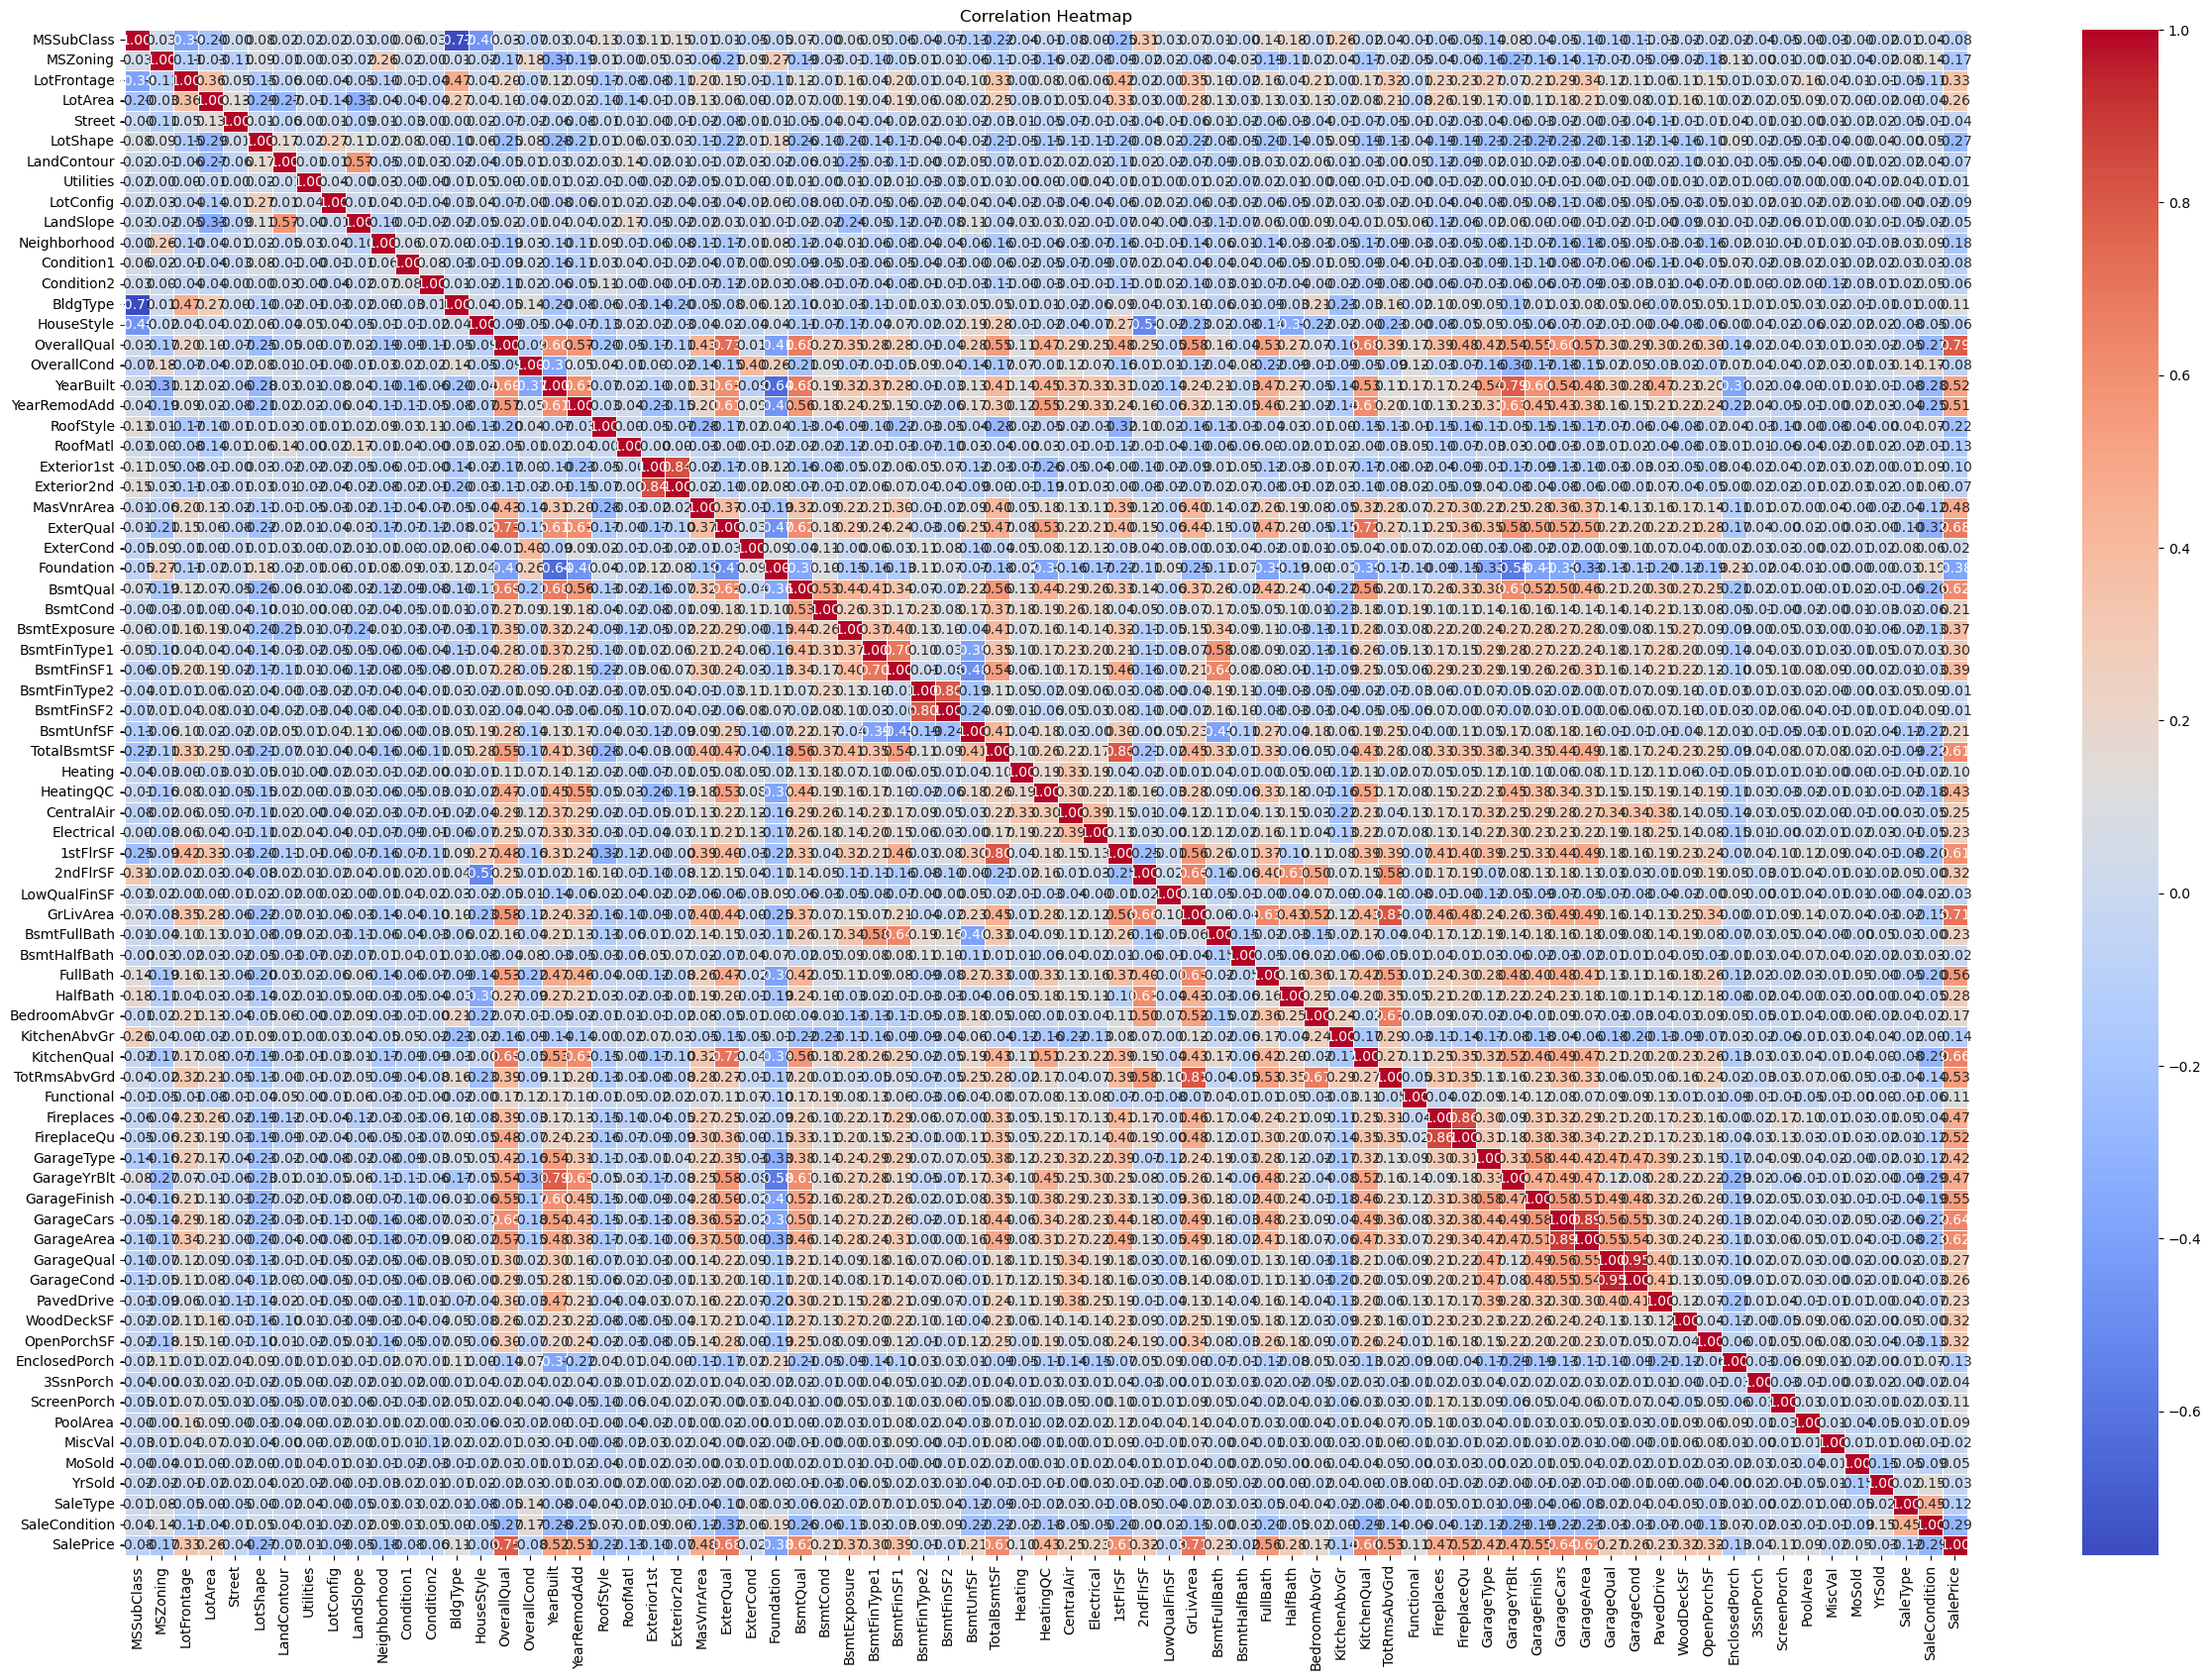

In [67]:
# final_train_df.shape
final_correlation_matrix = final_train_df.corr()

plt.figure(figsize=(30,20))
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()

In [68]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = final_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(final_train_df.values, i) for i in range(final_train_df.shape[1])]

# Set a threshold for high VIF
threshold = 5

# Get the features with high VIF
high_vif_features = vif_data[vif_data["VIF"] > threshold]["Feature"]

In [69]:
train_subset_df = final_train_df[high_vif_features]
train_subset_df

LotShape  RoofStyle  Foundation  SaleCondition  LotFrontage  \
Id                                                                  
1            3          4           3              5         65.0   
2            3          4           4              5         80.0   
3            2          4           3              5         68.0   
4            2          4           5              4         60.0   
5            2          4           3              5         84.0   
...        ...        ...         ...            ...          ...   
1456         3          4           3              5         62.0   
1457         3          4           4              5         85.0   
1458         3          4           1              5         66.0   
1459         3          2           4              5         68.0   
1460         3          4           4              5         75.0   

      OverallQual  YearBuilt  YearRemodAdd  ExterQual  BsmtQual  BsmtCond  \
Id                                                                          
1               7       2003          2003          2         3         3   
2               6       1976          1976          1         3         3   
3               7       2001          2002          2         3         3   
4               7       1915          1970          1         2         4   
5               8       2000          2000          2         3         3   
...           ...        ...           ...        ...       ...       ...   
1456            6       1999          2000          1         3         3   
1457            6       1978          1988          1         3         3   
1458            7       1941          2006          3         2         4   
1459            5       1950          1996          1         2         3   
1460            5       1965          1965          2         2         3   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
Id                                                                     
1                1             6       706.0      150.0        856.0   
2                4             5       978.0      284.0       1262.0   
3                2             6       486.0      434.0        920.0   
4                1             5       216.0      540.0        756.0   
5                3             6       655.0      490.0       1145.0   
...            ...           ...         ...        ...          ...   
1456             1             1         0.0      953.0        953.0   
1457             1             5       790.0      589.0       1542.0   
1458             1             6       275.0      877.0       1152.0   
1459             2             6        49.0        0.0       1078.0   
1460             1             4       830.0      136.0       1256.0   

      HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
Id                                                                       
1             4           1           4       856       854       1710   
2             4           1           4      1262         0       1262   
3             4           1           4       920       866       1786   
4             3           1           4       961       756       1717   
5             4           1           4      1145      1053       2198   
...         ...         ...         ...       ...       ...        ...   
1456          4           1           4       953       694       1647   
1457          2           1           4      2073         0       2073   
1458          4           1           4      1188      1152       2340   
1459          3           1           3      1078         0       1078   
1460          3           1           4      1256         0       1256   

      FullBath  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
Id                                                                   
1            2            2             8           0            0

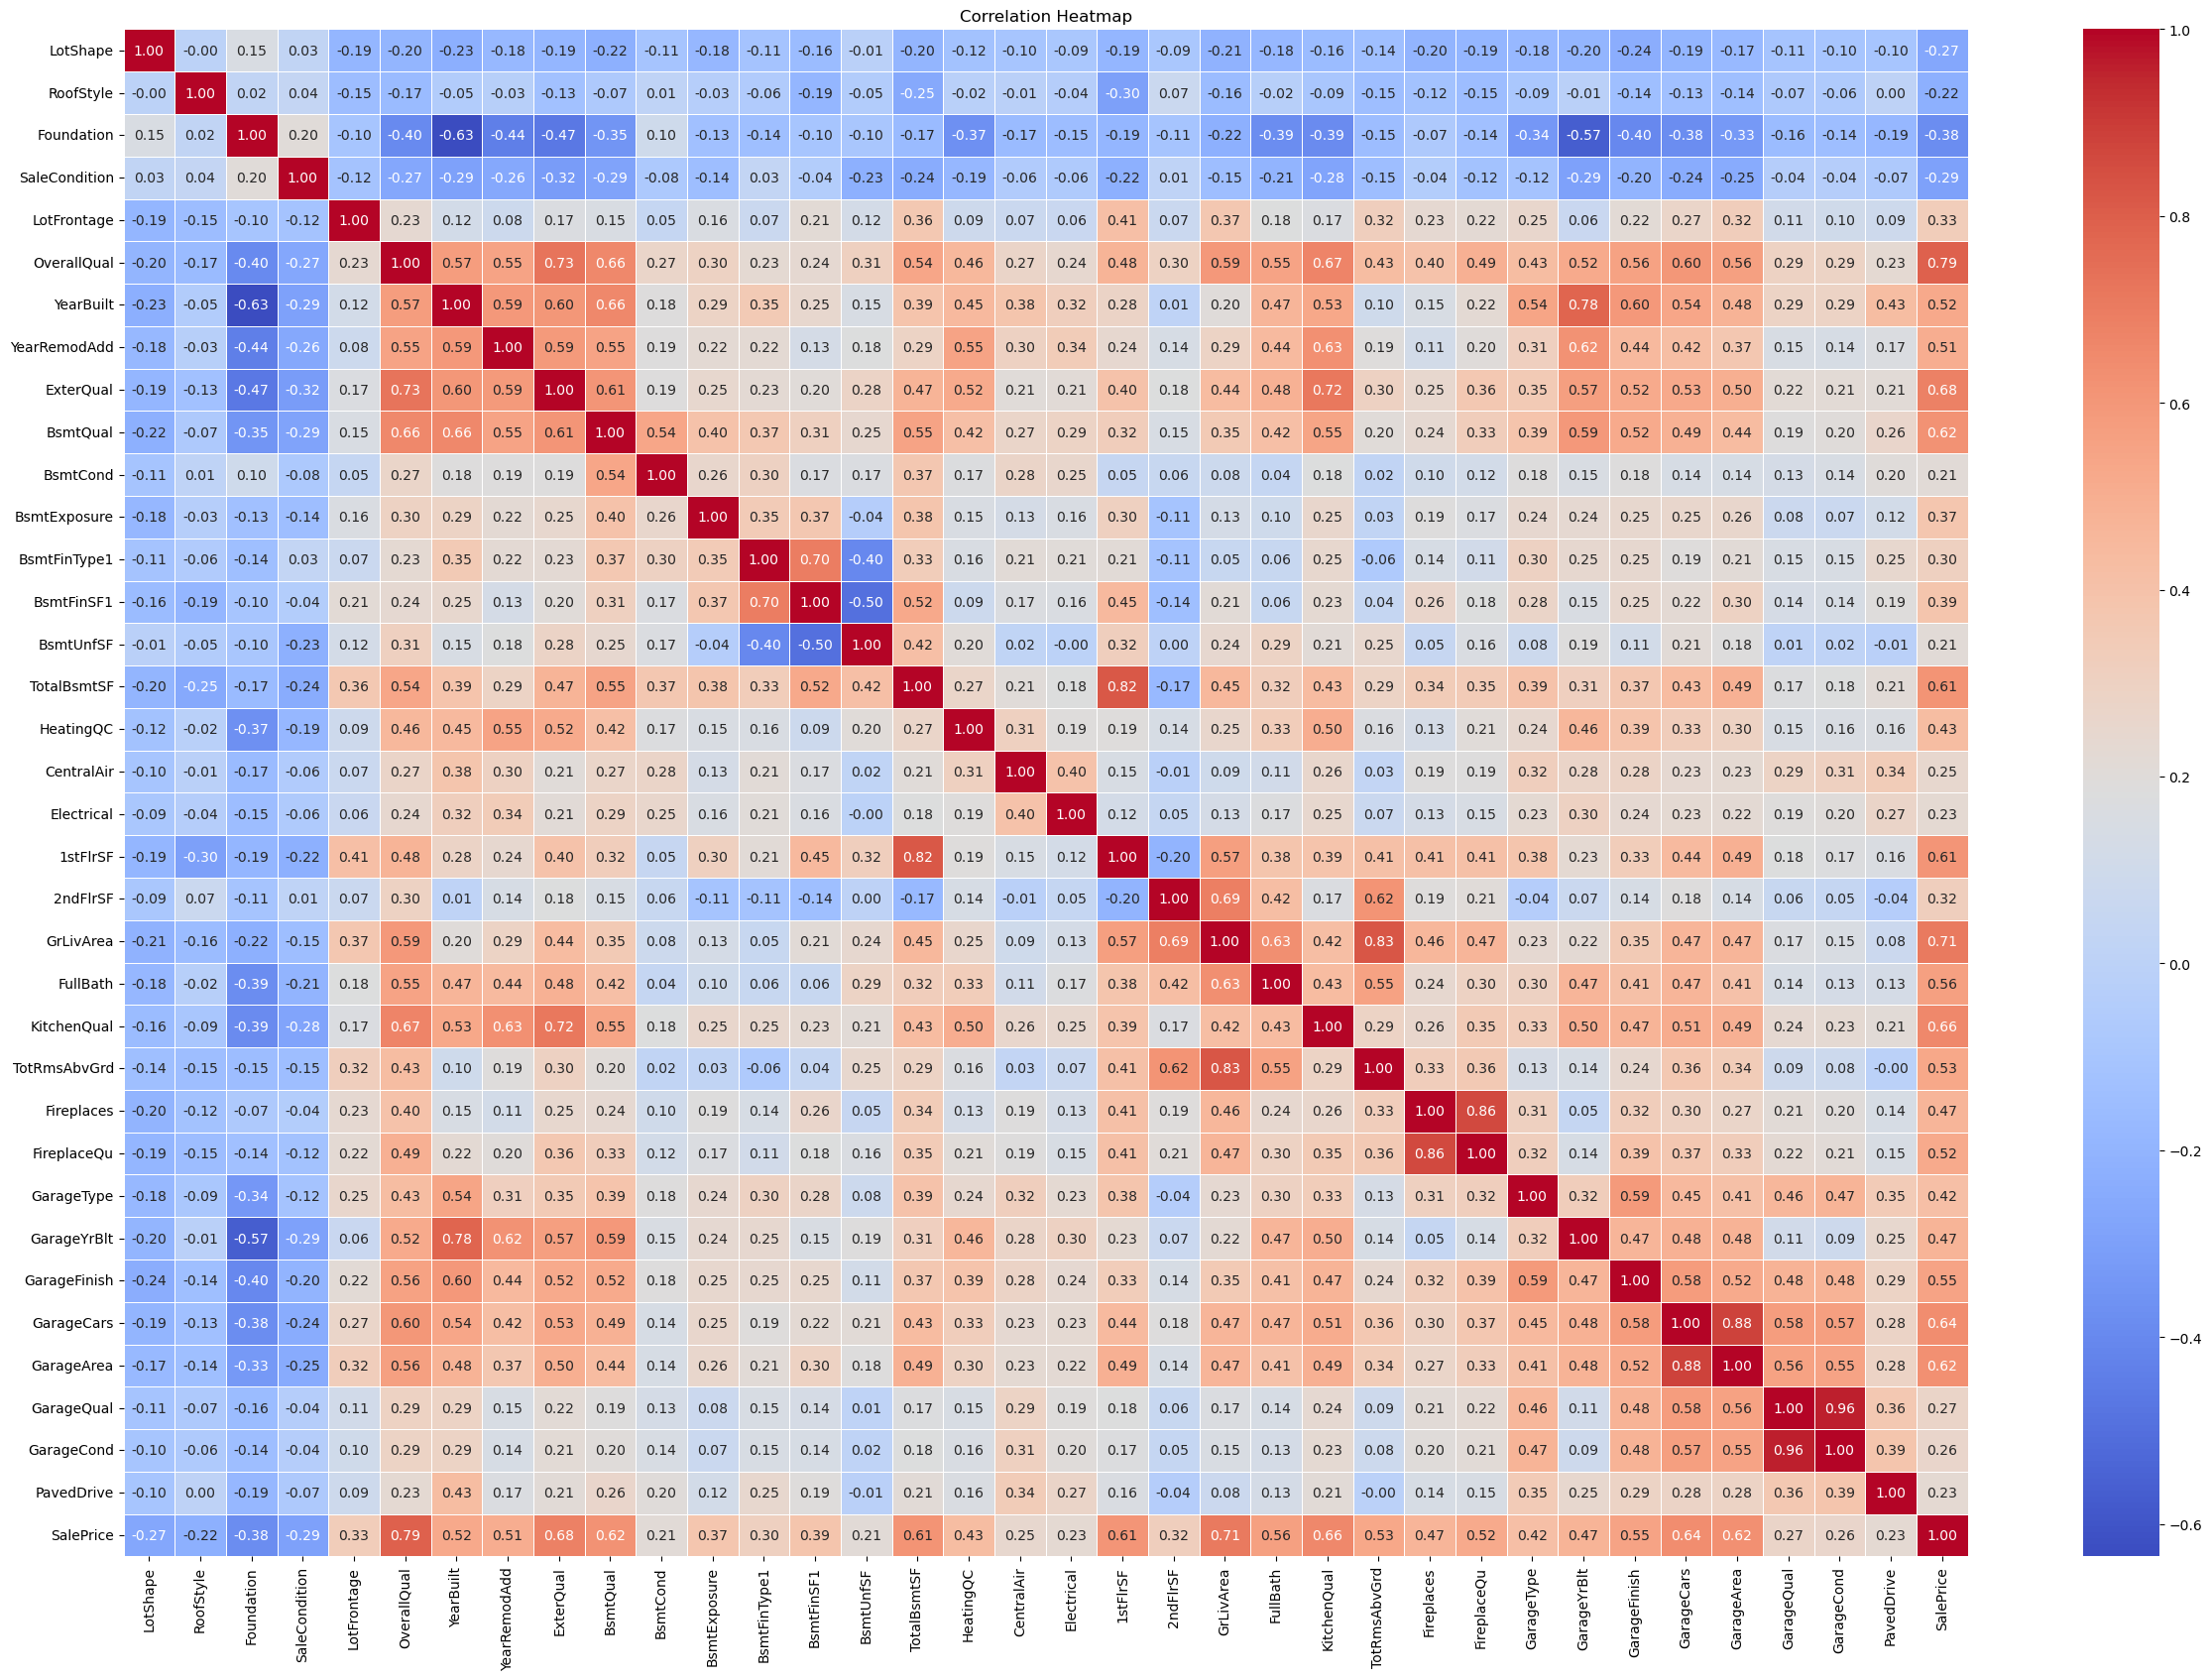

In [70]:
# final_train_df.shape
train_subset_correlation_matrix = train_subset_df.corr()

plt.figure(figsize=(30,20))
ax = sns.heatmap(train_subset_correlation_matrix, annot=True, fmt=".2f", linewidths=0.5, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()

In [71]:
features_to_remove = ['Fireplaces','GarageCond','GarageArea','GarageYrBlt','ExterQual','BsmtQual','HeatingQC','LotFrontage','2ndFlrSF','BsmtFinType1','TotalBsmtSF','KitchenQual','FullBath']
len(features_to_remove)

13

In [72]:
train_df_reduced = final_train_df.drop(columns=features_to_remove)
test_df_reduced = final_test_df.drop(columns=features_to_remove)

In [73]:
print(train_df_reduced.shape, test_df_reduced.shape)

(1460, 29) (1459, 29)


## Remove the Features having Poor Coorelation with 'SalePrice'

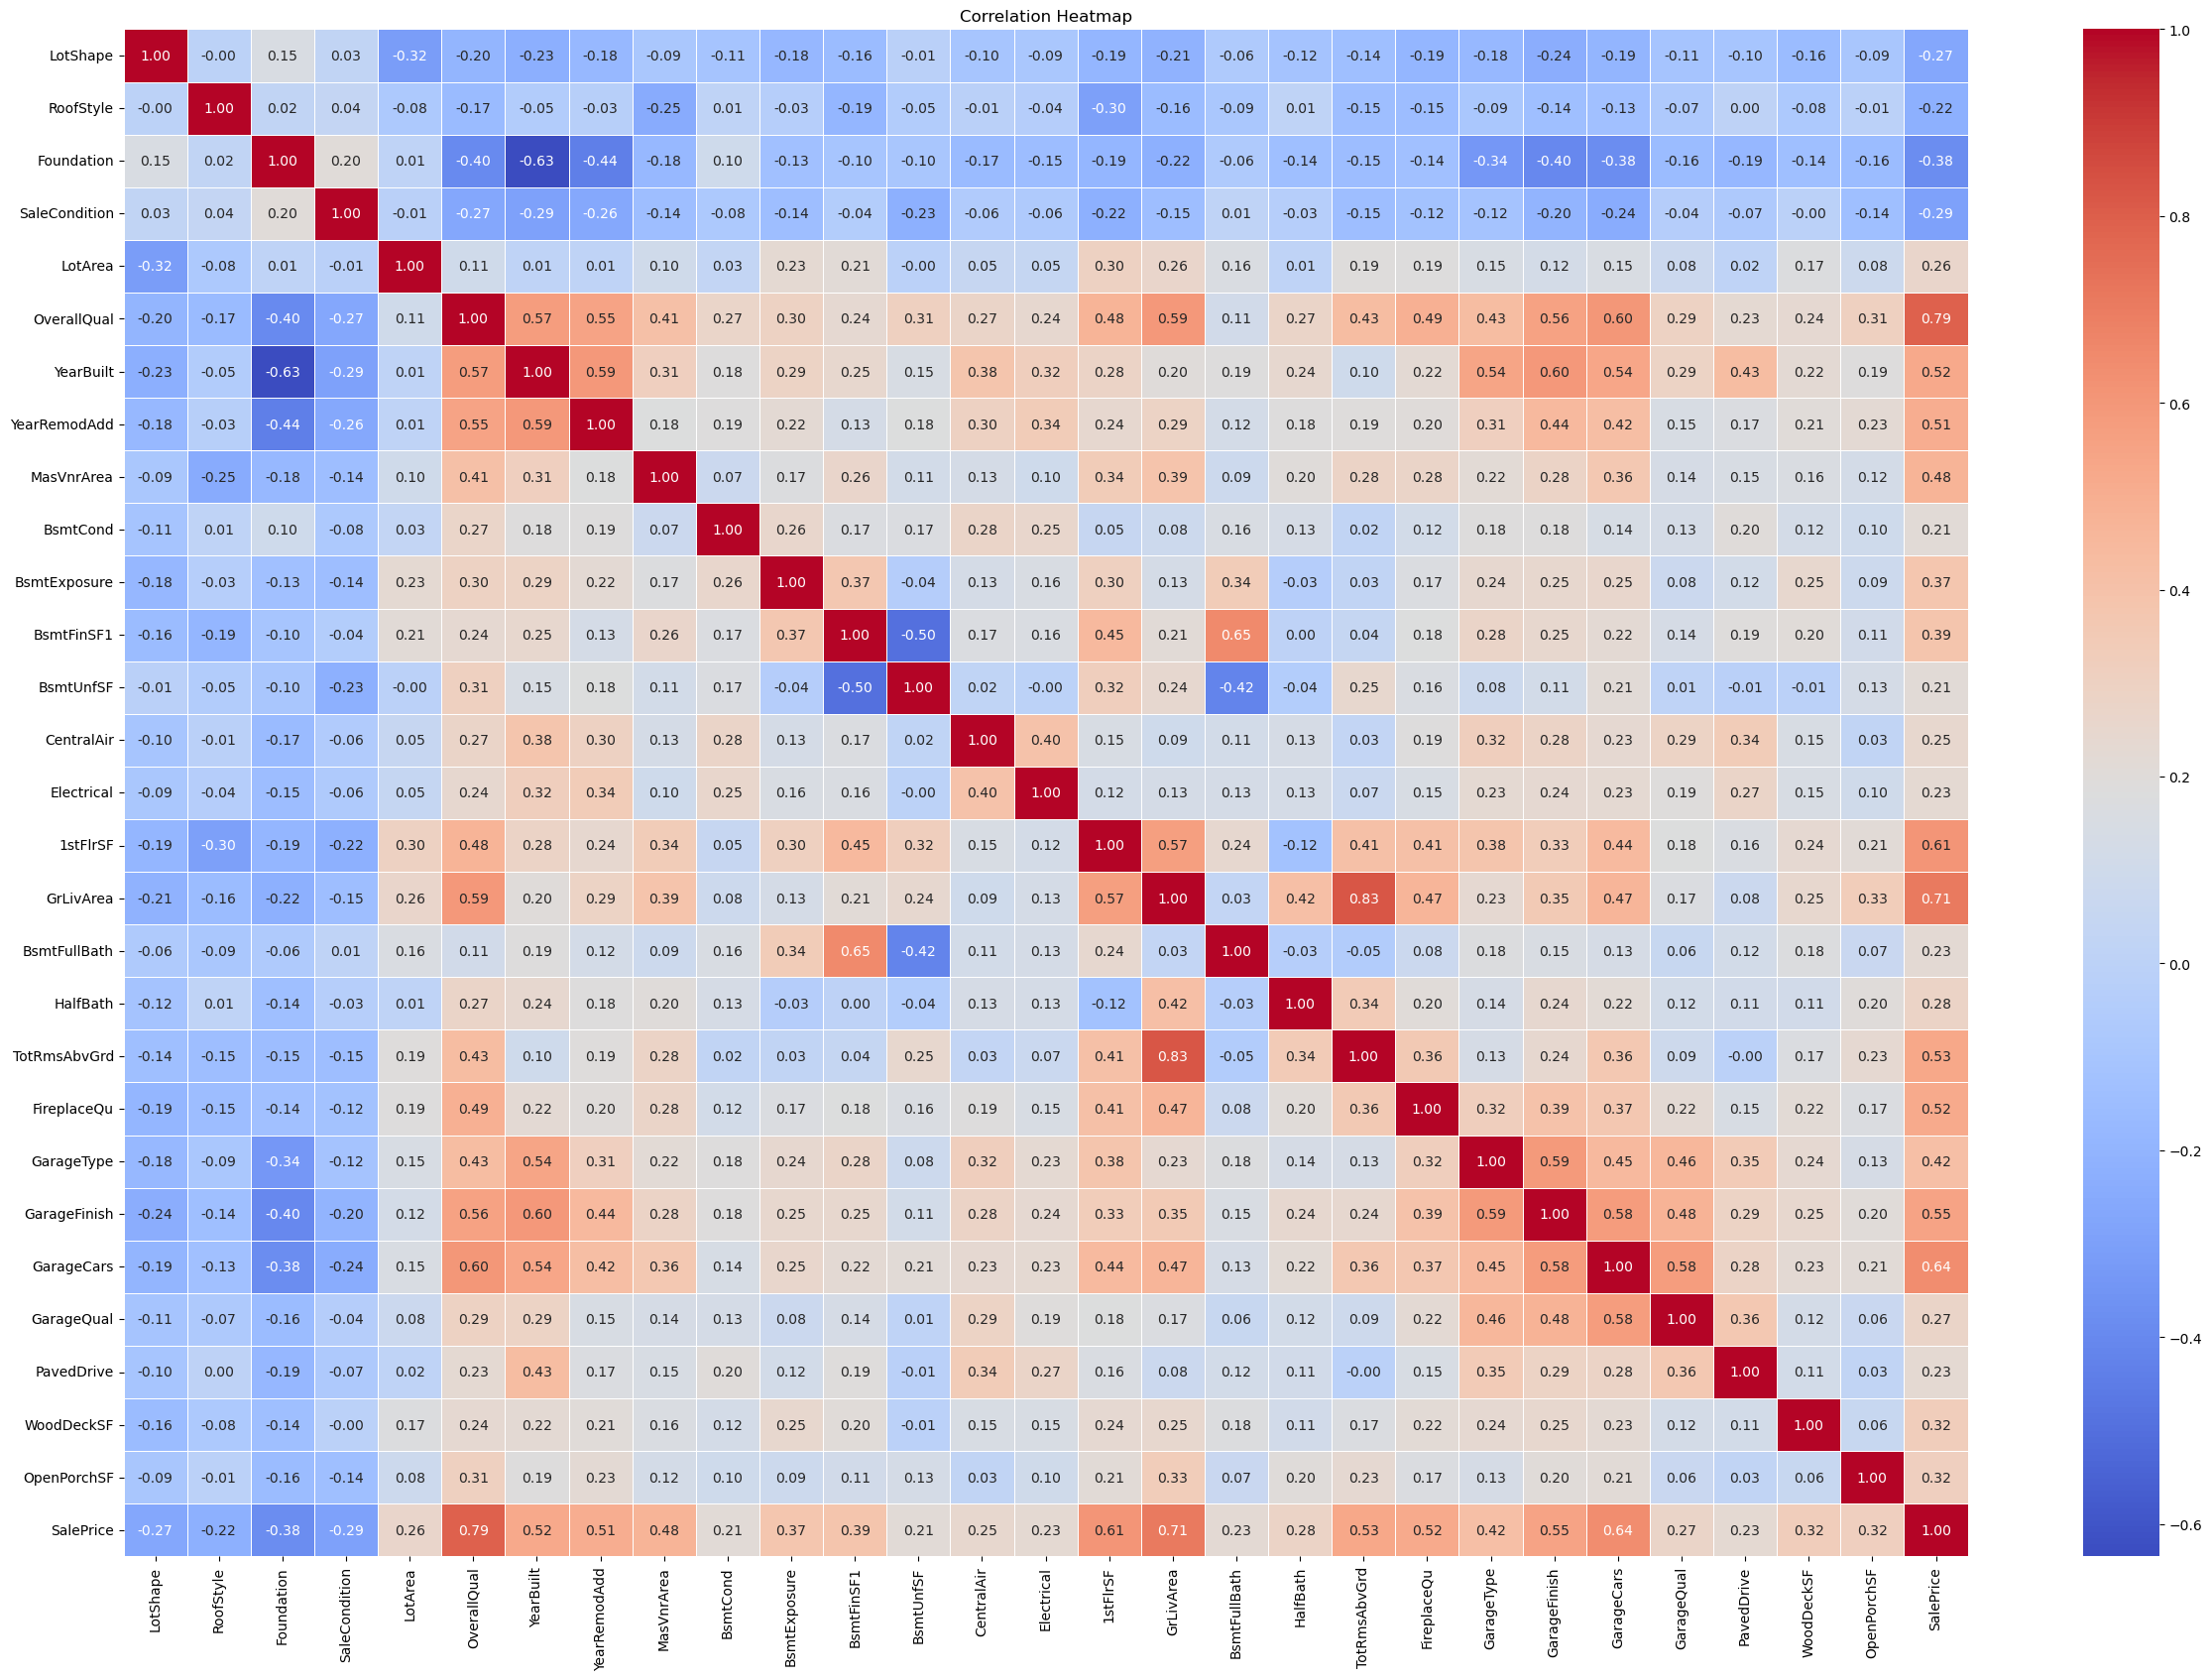

In [74]:
# final_train_df.shape
train_df_reduced_correlation_matrix = train_df_reduced.corr()

plt.figure(figsize=(30,20))
ax = sns.heatmap(train_df_reduced_correlation_matrix, annot=True, fmt=".2f", linewidths=0.5, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()

In [75]:
poor_correlated_features = ['LotArea','BsmtCond','BsmtUnfSF','CentralAir','Electrical','BsmtFullBath','HalfBath','PavedDrive','WoodDeckSF','OpenPorchSF']

In [76]:
train_df_reduced = train_df_reduced.drop(columns=poor_correlated_features)
test_df_reduced = test_df_reduced.drop(columns=poor_correlated_features)

In [77]:
print(train_df_reduced.shape, test_df_reduced.shape)

(1460, 19) (1459, 19)


## Remove Outlier from 'SalePrice' variable

In [78]:
Q1 = train_df_reduced["SalePrice"].quantile(0.25)
Q3 = train_df_reduced["SalePrice"].quantile(0.75)
IQR = Q3 - Q1
new_boundary = Q3 + 3*IQR   # If we use the standard formula, the more values will be removed.
train_df_reduced.drop(train_df_reduced[train_df_reduced["SalePrice"]>new_boundary].index, axis=0, inplace=True)

## Train the Data

In [79]:
y_train = train_df_reduced['SalePrice']
X_train = train_df_reduced.drop(["SalePrice"], axis=1)

In [80]:
X_test = test_df_reduced.drop(["SalePrice"], axis=1)

In [81]:
y_train

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1456    175000.0
1457    210000.0
1458    266500.0
1459    142125.0
1460    147500.0
Name: SalePrice, Length: 1448, dtype: float64

In [82]:
X_train

LotShape  RoofStyle  Foundation  SaleCondition  OverallQual  YearBuilt  \
Id                                                                             
1            3          4           3              5            7       2003   
2            3          4           4              5            6       1976   
3            2          4           3              5            7       2001   
4            2          4           5              4            7       1915   
5            2          4           3              5            8       2000   
...        ...        ...         ...            ...          ...        ...   
1456         3          4           3              5            6       1999   
1457         3          4           4              5            6       1978   
1458         3          4           1              5            7       1941   
1459         3          2           4              5            5       1950   
1460         3          4           4              5            5       1965   

      YearRemodAdd  MasVnrArea  BsmtExposure  BsmtFinSF1  1stFlrSF  GrLivArea  \
Id                                                                              
1             2003       196.0             1       706.0       856       1710   
2             1976         0.0             4       978.0      1262       1262   
3             2002       162.0             2       486.0       920       1786   
4             1970         0.0             1       216.0       961       1717   
5             2000       350.0             3       655.0      1145       2198   
...            ...         ...           ...         ...       ...        ...   
1456          2000         0.0             1         0.0       953       1647   
1457          1988       119.0             1       790.0      2073       2073   
1458          2006         0.0             1       275.0      1188       2340   
1459          1996         0.0             2        49.0      1078       1078   
1460          1965         0.0             1       830.0      1256       1256   

      TotRmsAbvGrd  FireplaceQu  GarageType  GarageFinish  GarageCars  \
Id                                                                      
1                8            0           5             2         2.0   
2                6            3           5             2         2.0   
3                6            3           5             2         2.0   
4                7            4           1             1         3.0   
5                9            3           5             2         3.0   
...            ...          ...         ...           ...         ...   
1456             7            3           5             2         2.0   
1457             7            3           5             1         2.0   
1458             9            4           5             2         1.0   
1459             5            0           5             1         1.0   
1460             6            0           5             3         1.0   

      GarageQual  
Id                
1              3  
2              3  
3              3  
4              3  
5              3  
...          ...  
1456           3  
1457           3  
1458           3  
1459           3  
1460           3  

[1448 rows x 18 columns]

In [83]:
X_test

LotShape  RoofStyle  Foundation  SaleCondition  OverallQual  YearBuilt  \
Id                                                                             
1461         3          4           4              5            5       1961   
1462         2          2           4              5            6       1958   
1463         2          4           3              5            5       1997   
1464         2          4           3              5            6       1998   
1465         2          4           3              5            8       1992   
...        ...        ...         ...            ...          ...        ...   
2915         3          4           4              5            4       1970   
2916         3          4           4              4            4       1970   
2917         3          4           4              4            5       1960   
2918         3          4           3              5            5       1992   
2919         3          4           3              5            7       1993   

      YearRemodAdd  MasVnrArea  BsmtExposure  BsmtFinSF1  1stFlrSF  GrLivArea  \
Id                                                                              
1461          1961         0.0             1       468.0       896        896   
1462          1958       108.0             1       923.0      1329       1329   
1463          1998         0.0             1       791.0       928       1629   
1464          1998        20.0             1       602.0       926       1604   
1465          1992         0.0             1       263.0      1280       1280   
...            ...         ...           ...         ...       ...        ...   
2915          1970         0.0             1         0.0       546       1092   
2916          1970         0.0             1       252.0       546       1092   
2917          1996         0.0             1      1224.0      1224       1224   
2918          1992         0.0             3       337.0       970        970   
2919          1994        94.0             3       758.0       996       2000   

      TotRmsAbvGrd  FireplaceQu  GarageType  GarageFinish  GarageCars  \
Id                                                                      
1461             5            0           5             1         1.0   
1462             6            0           5             1         1.0   
1463             6            3           5             3         2.0   
1464             7            4           5             3         2.0   
1465             5            0           5             2         2.0   
...            ...          ...         ...           ...         ...   
2915             5            0           0             0         0.0   
2916             6            0           2             1         1.0   
2917             7            3           1             1         2.0   
2918             6            0           0             0         0.0   
2919             9            3           5             3         3.0   

      GarageQual  
Id                
1461           3  
1462           3  
1463           3  
1464           3  
1465           3  
...          ...  
2915           0  
2916           3  
2917           3  
2918           0  
2919           3  

[1459 rows x 18 columns]

## Cross Validation Function

In [84]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

## Linear Regression Model

In [85]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.7969338272079195]

## Ridge Regression Model

In [86]:
rdg = linear_model.Ridge()
test_model(rdg)

[0.7969419960964536]

## Lasso Regression Model

In [87]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.7969338274179022]

## Decision Tree Regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

[0.7353924258633445]

## Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 500, random_state=51)
test_model(rf_reg)

[0.8630166988180727]

## Applying the Random Forest Model

In [90]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=500, random_state=51)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=500, random_state=51)

In [94]:
# Make predictions on the test data
y_predictions = rf_model.predict(X_test)


In [95]:
y_predictions

array([119086.53 , 148988.5  , 181105.02 , ..., 144233.422, 112776.866,
       241416.61 ])

In [96]:
# Create the submission file.
predicted_df = pd.DataFrame(y_predictions)
sample_file = pd.read_csv('sample_submission.csv')
resultant_df = pd.concat([sample_file['Id'], predicted_df], axis=1)
resultant_df.columns = ['Id', 'SalePrice']
resultant_df.to_csv('my_submission_house_price_pred.csv', index=False)

In [97]:
my_submission = pd.read_csv('my_submission_house_price_pred.csv')
my_submission

Id   SalePrice
0     1461  119086.530
1     1462  148988.500
2     1463  181105.020
3     1464  183998.300
4     1465  190814.159
...    ...         ...
1454  2915   80385.504
1455  2916   86168.026
1456  2917  144233.422
1457  2918  112776.866
1458  2919  241416.610

[1459 rows x 2 columns]